# Motion Planning, Assignment 8: Q-Learning with openai gym

Thao Dang, Hochschule Esslingen

In this assignment you will experiment with Q learning for a classic control problem: balancing a pole on a moving cart.

![cartpole.png](https://drive.google.com/uc?id=1b9GxE9zRkxPCBX-D-LfrIrbehNZdjP4J)

Note for solution: 
This notebook is based on https://github.com/IsaacPatole/CartPole-v0-using-Q-learning-SARSA-and-DNN/blob/master/Qlearning_for_cartpole.py

# Simulations with openai gym

This assignment will utilize a famous simulation environment for testing reinforcement learning algorithms: http://gym.openai.com

## Installation

If you are using Anaconda or Miniconda and a **Mac or a Unix machine**, installation is rather straightforward. Just create the following environment and you should be good to go:
```
    conda create --name gym python=3.7
    conda activate gym

    conda install conda matplotlib seaborn
    conda install -c conda-forge jupyter_contrib_nbextensions gym-all
    conda install -c anaconda tensorflow
    
    jupyter notebook
```

If you are using **Windows**, you may have to additionally have to install other libraries as described [here](https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30) (but I haven't tried this and can't support).

When running in **Colab**, just transform the following cell to code and execute it:

!pip install gym pyvirtualdisplay > /dev/null 2>&1

!apt-get update

!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Now, let's import all relevant packages and define some import functions that help displaying videos on colab.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
import random

In [2]:
IN_COLAB = False
try:
    from google.colab import files
    IN_COLAB = True
except:
    print('Not in Colab.')

    
if IN_COLAB:
    from IPython.display import HTML
    from pyvirtualdisplay import Display
    from IPython import display as ipythondisplay

    display = Display(visible=0, size=(1400, 900))
    display.start()

    
    
"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""


def show_video():
    if not IN_COLAB:
        return
    
    # in colab, everything is done via video
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

Not in Colab.


## The cart pole environment

After everything has been set up, we are ready to try some nice simulations. Here, we will only use the cart pole environment (https://gym.openai.com/envs/CartPole-v1/). The description of this environment is as follows:
```
Description:
    A pole is attached by an un-actuated joint to a cart, which moves along
    a frictionless track. The pendulum starts upright, and the goal is to
    prevent it from falling over by increasing and reducing the cart's
    velocity.
Source:
    This environment corresponds to the version of the cart-pole problem
    described by Barto, Sutton, and Anderson
Observation:
    Type: Box(4)
    Num     Observation               Min                     Max
    0       Cart Position             -4.8                    4.8
    1       Cart Velocity             -Inf                    Inf
    2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
    3       Pole Angular Velocity     -Inf                    Inf
Actions:
    Type: Discrete(2)
    Num   Action
    0     Push cart to the left
    1     Push cart to the right
    Note: The amount the velocity that is reduced or increased is not
    fixed; it depends on the angle the pole is pointing. This is because
    the center of gravity of the pole increases the amount of energy needed
    to move the cart underneath it
Reward:
    Reward is 1 for every step taken, including the termination step
Starting State:
    All observations are assigned a uniform random value in [-0.05..0.05]
Episode Termination:
    Pole Angle is more than 12 degrees.
    Cart Position is more than 2.4 (center of the cart reaches the edge of
    the display).
    Episode length is greater than 200.
    Solved Requirements:
    Considered solved when the average return is greater than or equal to
    195.0 over 100 consecutive trials.    
```
(taken from: https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

To run this simulation, the following class ``CartPoleBase`` may be useful. It provides two important functions:
* ``act``: the standard policy function that generates an action from the current state data (you will overwrite this function later), and
* ``run``: which runs and renders a simulation once ``act`` has been defined.

In [3]:
class CartPoleBase():
    def __init__(self, num_episodes=500):
        """
        The constructor.
        num_episodes is the max number of steps to take (given that the trial does not fail before)
        """
        self.num_episodes = num_episodes
        self.env = gym.make('CartPole-v0')
        
        
    def act(self, observation, reward, done):
        """
        A very simple agent that randomly chooses an action.
        
        Arguments (everything the simulator provides): 
            observation: the observed state (Cart Position, Cart Velocity, Pole Angle, 
                         Pole Angular Velocity)
            reward:      1 for every step taken
            done:        true if simulation terminated
    
        Return:
            0 to push cart to the left, 1 to push cart to the right
        """
        assert False, "not implemented yet"
        return 0 
        

    def run(self):
        """Runs an episode while displaying the cartpole environment."""
        self.env = wrap_env(self.env)
        t = 0
        reward = 0
        done = False
        obs = self.env.reset()
        
        while not done:
                self.env.render()
                t = t+1
                action = self.act(obs, reward, done)
                obs, reward, done, _ = self.env.step(action)
                
        self.env.close()
        show_video()
        return t
    

# Exercise 1: Random policy

Let's first try everything we have installed so far by running an agent that chooses actions at random and render the scene. You will only have to add one line here.

In [4]:
class CartPoleRandom(CartPoleBase):
    def act(self, observation, reward, done):
        """
        A very simple agent that randomly chooses an action.
        
        Arguments (everything the simulator provides): 
            observation: the observed state (Cart Position, Cart Velocity, Pole Angle, 
                         Pole Angular Velocity)
            reward:      1 for every step taken
            done:        true if simulation terminated
    
        Return:
            0 to push cart to the left, 1 to push cart to the right
        """
        ## TODO: Add your code here 
        return self.env.action_space.sample()

In [5]:
randomAgent = CartPoleRandom()
steps_taken = randomAgent.run()
print('Finished after %d steps.' % steps_taken)

Finished after 45 steps.


# Exercise 2: Q-learning

Next, you will use Q-learning based on the Bellmann equation as described in the lecture to find a **Q-value function** or **Q-table** that estimates the maximum expected cumulative reward achievable
from a given (state, action) pair.

A Q-table is discrete in its nature, yet the problem we are considering here is continous since the observations that we make (cart position, cart velocity, pole angle, pole angular velocity) are continous, real numbers. To still be able to use Q-learning, we need to **discretize** our system. This is done by quantisation of all observations in separate buckets (or bins) and refering to them by the index of the bucket in which they belong.
E.g. if we know that cart velocity is always within the range -0.5..0.5 and we want to use four bins for discretization, we could transform the real-valued cart velocity $v$ to a discrete value $v_d=0$ if $v < -0.25$, to $v_d=1$ if $-0.25 \leq v < 0$, to $v_d=2$ if $0 \leq v < 0.25$, and to $v_d=3$ if $v \geq 0.5$. Using such a discretization, our cart pole problem becomes computationally tractable for the Q-learning algorithm.  

The Q-learning algorithm that you will implement here is a slightly modified version from the algorithm given in the lecture:

> **Given**: rewards $r$, discount factor $\gamma$, learning rate $\alpha$, probability threshold $\epsilon$
>
> **Algorithm**:
> 1. Initialize Q-table to zero.
> 2. For each episode (a.k.a. training session):
>> 3. Select (random) initial state $s_t$.
>> 4. Do while the goal state hasn't been reached:
>>> 5. If random number $p<\epsilon$: Randomly select one action $a_t$ among all possible actions for the current state $s_t$. Otherwise: Select best action based on current Q-table. Both actions result in next state $s_{t+1}$.
>>> 6. Update expected cumulative reward: $$Q(s_t, a_t) \leftarrow (1−\alpha) 𝑄(s_t, a_t) + \alpha \left[ r(s_t, a_t) + \gamma max_{a}⁡ \{ Q(s_{t+1}, a) \} \right]$$
>>> 7. Set the next state as the current state $s_t \leftarrow s_{t+1}$

## Exercise 2.1: Algorithm

What is the major difference between the algorithm shown above and the version presented in the lecture. What are potential reasons behind this modification?

In the algorithm above, it is common to adapt the learning and epsilon with the episodes. How and why would you modify these parameters? 

The following class is a skeleton for implemening the Q-learning algorithm.

In [6]:
class CartPoleQAgent(CartPoleBase):
    def __init__(self, num_bins=(3, 3, 6, 6), 
                 num_episodes=500, min_lr=0.1, 
                 min_epsilon=0.1, discount=1.0, decay=25):
        """
        The constructor.
        Arguments:
            num_bins: the number of bins for discretization of all four observations
            num_episodes: max number of steps to take 
            min_lr: minimum learning rate
            min_epsilon: minimum epsilon value (used for sampling random actions)
            discount: discount factor
            decay: a decay factor used for adaptation of the learning rate and epsilon
        """
        CartPoleBase.__init__(self, num_episodes)
        
        self.num_bins = num_bins
        self.min_lr = min_lr
        self.min_epsilon = min_epsilon
        self.discount = discount
        self.decay = decay
        
        # action-value function initialized with 0's
        # the Q-table has shape "num_bins[0] x num_bins[1] x num_bins[2] x num_bins[3] x 2"
        self.Q_table = np.zeros(self.num_bins + (self.env.action_space.n,))

        # [position, velocity, angle, angular velocity]
        self.upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50) / 1.]
        self.lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50) / 1.]
        
        # bins for discretization
        self.bins = []
        for low, high, num in zip(self.lower_bounds, self.upper_bounds, self.num_bins):
            delta = (high-low)/num
            b = [low+(i+1)*delta for i in range(num-1)]
            self.bins.append(b)
        
        # book keeping of steks take in each episode
        self.steps = np.zeros(self.num_episodes)
        

    def discretize_state(self, obs):
        """
        Takes an observation of the environment and aliases it.
        By doing this, very similar observations can be treated
        as the same and it reduces the state space so that the 
        Q-table can be smaller and more easily filled.
        
        Input:
        obs (tuple): Tuple containing 4 floats describing the current
                     state of the environment.
        
        Output:
        discretized (tuple): Tuple containing 4 non-negative integers smaller 
                             than n where n is the number in the same position
                             in the num_bins list.
        """
        discretized = list()
        for i in range(len(obs)):
            new_obs = np.digitize(obs[i], self.bins[i])
            discretized.append(new_obs)
        
        return tuple(discretized)


    def decay_function(self, t, min_val):
        """
        A decay function for modelling learning rate and epsilon in training function.
        Arguments:
            t: num epochs
            min_val: returned decay value is never smaller than this
        """
        return max(min_val, min(1., 1. - math.log10((t + 1) / self.decay)))

    
    def train(self):
        """
        Implements the Q-learning algorithm as described in the text above.
        """
        # Looping for each episode
        for e in range(self.num_episodes):
            # Initializes the state
            current_state = self.discretize_state(self.env.reset())

            # decaying learning rate and epsilon 
            self.learning_rate = self.decay_function(e, self.min_lr)
            self.epsilon = self.decay_function(e, self.min_epsilon)
            done = False
            
            # Looping for each step
            while not done:
                self.steps[e] += 1
                
                ## TODO: Add your code here
                
                # choose action from state
                if (np.random.random() < self.epsilon):
                    action = self.env.action_space.sample() 
                else:
                    action = np.argmax(self.Q_table[current_state])
        
                # Take action
                obs, reward, done, _ = self.env.step(action)
                new_state = self.discretize_state(obs)
                
                # Update Q(S,A)
                self.Q_table[current_state][action] = (1-self.learning_rate) * self.Q_table[current_state][action] + \
                    self.learning_rate * (reward + self.discount * np.max(self.Q_table[new_state]))
                
                current_state = new_state
                
                # We break out of the loop when done is False which is
                # a terminal state.
        print('Finished training!')
        
    
    def plot_learning(self):
        """
        Plots the number of steps at each episode and prints the
        amount of times that an episode was successfully completed.
        """
        sns.lineplot(x=range(len(self.steps)), y=self.steps)
        plt.xlabel("Episode")
        plt.ylabel("Steps")
        plt.show()
        t = 0
        for i in range(self.num_episodes):
            if self.steps[i] == 200:
                t+=1
        print(t, " episodes were successfully completed.")
        
        
    def act(self, observation, reward, done):
        """
        A Q-learning based agent.
        
        Arguments (everything the simulator provides): 
            observation: the observed state (Cart Position, Cart Velocity, Pole Angle, 
                         Pole Angular Velocity)
            reward:      1 for every step taken
            done:        true if simulation terminated
    
        Return:
            0 to push cart to the left, 1 to push cart to the right
        """
        
        ## TODO: Add your code here
        state = self.discretize_state(observation)
        return np.argmax(self.Q_table[state])

## Exercise 2.2: Training

Implement the ``train`` function above and run the training using the code below.

Finished training!


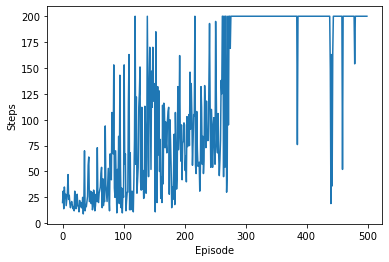

227  episodes were successfully completed.


In [7]:
agent = CartPoleQAgent()
agent.train()
agent.plot_learning()

## Exercise 2.3: Evaluation

Implement the ``act`` function above and see how your trained policy performs.

Try modifying the hyperparameters (learning rate, epsilon, ...) of the algorithm and compare performances.

In [8]:
steps_taken = agent.run()
print('Finished after %d steps.' % steps_taken)

Finished after 200 steps.


# Exercise 3: Deep Q-learning (optional)

As an optional exercise, you can study a deep Q-network as an alternative solution to the cart pole problem.

A Q-network does not require a discretization of the state space, but as you will see, it can take quite a while to learn. You can try to run the following code in Colab and even use a GPU for training.

The code below has been adapted from [here](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter9-drl/dqn-cartpole-9.6.1.py). It uses two "tricks" that are helpful when training a deep Q-network:

1. **Replay memory**: As decribed in the lecture slides, learning from batches of consecutive simulation samples is problematic: Consecutive samples in time are presumably highly correlated. This correlation in training batches leads to inefficient training and may bias the result. To deal with this problem, it is advisable to establish a replay memory and then sample (non-consecutive) state-action data points from this memory.

2. **Target networks**: In Q-Learning, we update "a guess with a guess" which can lead to unstable results. The Bellman equation defines a relationship between Q(s(t), a(t)) and Q(s(t+1), a(t+1)). Altering Q(s(t), a(t)) may influence Q(s(t+1), a(t+1)) and other states nearby, leading to fluctuations in the training results. To overcome this effect, a copy of the network is used to compute Q(s(t+1), a(t+1)). This copy is not trained, but only periodically synced to the main network.

More information on both measures can be found [here](https://towardsdatascience.com/deep-q-network-dqn-ii-b6bf911b6b2c).

Study the code below and find the replay memory and target network implementations. Run the network (this may take a while, you may start with smaller networks at first), and check the results of the network.


In [9]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from collections import deque

import numpy as np
import random
import gym
from gym import wrappers
import sys

In [10]:
class DQNAgent(CartPoleBase):
    def __init__(self, num_episodes=300): # try: num_episodes=3000
        """DQN Agent on CartPole-v0 environment

        Arguments:
            num_episodes (int): max number of episodes to train
        """
        CartPoleBase.__init__(self, num_episodes)
        
        self.action_space = self.env.action_space

        # experience buffer
        self.memory = []

        # discount rate
        self.gamma = 0.9

        # initially 90% exploration, 10% exploitation
        self.epsilon = 1.0
        # iteratively applying decay til 
        # 10% exploration/90% exploitation
        self.epsilon_min = 0.1
        self.epsilon_decay = self.epsilon_min / self.epsilon
        self.epsilon_decay = self.epsilon_decay ** (1. / float(500))

        # Q Network weights filename
        self.weights_file = 'dqn_cartpole.h5'
        # Q Network for training
        n_inputs = self.env.observation_space.shape[0]
        n_outputs = self.action_space.n
        self.q_model = self.build_model(n_inputs, n_outputs)
        self.q_model.compile(loss='mse', optimizer=Adam())
        self.q_model.summary()
        # target Q Network
        self.target_q_model = self.build_model(n_inputs, n_outputs)
        # copy Q Network params to target Q Network
        self.update_weights()

        self.replay_counter = 0

    
    def build_model(self, n_inputs, n_outputs):
        """Q Network is 256-256-256 MLP

        Arguments:
            n_inputs (int): input dim
            n_outputs (int): output dim

        Return:
            q_model (Model): DQN
        """
        inputs = Input(shape=(n_inputs, ), name='state')
        x = Dense(256, activation='relu')(inputs)
        x = Dense(256, activation='relu')(x)
        x = Dense(256, activation='relu')(x)
        x = Dense(n_outputs,
                  activation='linear', 
                  name='action')(x)
        q_model = Model(inputs, x)
        return q_model


    def save_weights(self):
        """save Q Network params to a file"""
        self.q_model.save_weights(self.weights_file)

        
    def load_weights(self):
        """load Q Network params to a file"""
        self.q_model.load_weights(self.weights_file)
        
        
    def update_weights(self):
        """copy trained Q Network params to target Q Network"""
        self.target_q_model.set_weights(self.q_model.get_weights())

        
    def remember(self, state, action, reward, next_state, done):
        """store experiences in the replay buffer
        Arguments:
            state (tensor): env state
            action (tensor): agent action
            reward (float): reward received after executing
                action on state
            next_state (tensor): next state
        """
        item = (state, action, reward, next_state, done)
        self.memory.append(item)


    def get_target_q_value(self, next_state, reward):
        """compute Q_max
           Use of target Q Network solves the 
            non-stationarity problem
        Arguments:
            reward (float): reward received after executing
                action on state
            next_state (tensor): next state
        Return:
            q_value (float): max Q-value computed
        """
        # max Q value among next state's actions
        # DQN chooses the max Q value among next actions
        # selection and evaluation of action is 
        # on the target Q Network
        # Q_max = max_a' Q_target(s', a')
        q_value = np.amax(\
                     self.target_q_model.predict(next_state)[0])

        # Q_max = reward + gamma * Q_max
        q_value *= self.gamma
        q_value += reward
        return q_value


    def replay(self, batch_size):
        """experience replay addresses the correlation issue 
            between samples
        Arguments:
            batch_size (int): replay buffer batch 
                sample size
        """
        # sars = state, action, reward, state' (next_state)
        sars_batch = random.sample(self.memory, batch_size)
        state_batch, q_values_batch = [], []

        # fixme: for speedup, this could be done on the tensor level
        # but easier to understand using a loop
        for state, action, reward, next_state, done in sars_batch:
            # policy prediction for a given state
            q_values = self.q_model.predict(state)
            
            # get Q_max
            q_value = self.get_target_q_value(next_state, reward)

            # correction on the Q value for the action used
            q_values[0][action] = reward if done else q_value

            # collect batch state-q_value mapping
            state_batch.append(state[0])
            q_values_batch.append(q_values[0])

        # train the Q-network
        self.q_model.fit(np.array(state_batch),
                         np.array(q_values_batch),
                         batch_size=batch_size,
                         epochs=1,
                         verbose=0)

        # update exploration-exploitation probability
        self.update_epsilon()

        # copy new params on old target after 
        # every 10 training updates
        if self.replay_counter % 10 == 0:
            self.update_weights()

        self.replay_counter += 1

    
    def update_epsilon(self):
        """decrease the exploration, increase exploitation"""
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
        
    def train(self):
        args = {}
        args['env_id'] = 'CartPole-v0'
        args['no-render'] = True

        # the number of trials without falling over
        win_trials = 100

        # the CartPole-v0 is considered solved if 
        # for 100 consecutive trials, he cart pole has not 
        # fallen over and it has achieved an average 
        # reward of 195.0 
        # a reward of +1 is provided for every timestep 
        # the pole remains upright
        win_reward = { 'CartPole-v0' : 195.0 }

        # stores the reward per episode
        scores = deque(maxlen=win_trials)

        self.env.seed(0)

        # should be solved in this number of episodes
        episode_count = self.num_episodes
        state_size = self.env.observation_space.shape[0]
        batch_size = 64

        # by default, CartPole-v0 has max episode steps = 200
        # you can use this to experiment beyond 200
        # env._max_episode_steps = 4000

        # Q-Learning sampling and fitting
        for episode in range(episode_count):
            state = self.env.reset()
            state = np.reshape(state, [1, state_size])
            done = False
            total_reward = 0
            while not done:
                # in CartPole-v0, action=0 is left and action=1 is right
                if np.random.rand() < self.epsilon:
                    # explore - do random action
                    action = self.action_space.sample()
                else:
                    # exploit
                    q_values = self.q_model.predict(state)
                    # select the action with max Q-value
                    action = np.argmax(q_values[0])
                
                next_state, reward, done, _ = self.env.step(action)
                # in CartPole-v0:
                # state = [pos, vel, theta, angular speed]
                next_state = np.reshape(next_state, [1, state_size])
                # store every experience unit in replay buffer
                self.remember(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward


            # call experience relay
            if len(self.memory) >= batch_size:
                self.replay(batch_size)

            scores.append(total_reward)
            mean_score = np.mean(scores)
            if mean_score >= win_reward[args['env_id']] \
                    and episode >= win_trials:
                print("Solved in episode %d: \
                       Mean survival = %0.2lf in %d episodes"
                      % (episode, mean_score, win_trials))
                print("Epsilon: ", self.epsilon)
                self.save_weights()
                break
            if True: #(episode + 1) % win_trials == 0:
                print("Episode %d: Mean survival = \
                       %0.2lf in %d episodes" %
                      ((episode + 1), mean_score, win_trials))
                sys.stdout.flush()

        # close the env and write monitor result info to disk
        self.env.close() 
        
        
    def act(self, observation, reward, done):
        """
        An deep Q-learning based agent.
        
        Arguments (everything the simulator provides): 
            observation: the observed state (Cart Position, Cart Velocity, Pole Angle, 
                         Pole Angular Velocity)
            reward:      1 for every step taken
            done:        true if simulation terminated
    
        Return:
            0 to push cart to the left, 1 to push cart to the right
        """
        state_size = self.env.observation_space.shape[0]
        state = np.reshape(observation, [1, state_size])
        q_values = self.q_model.predict(state)
        # select the action with max Q-value
        action = np.argmax(q_values[0])
        return action

In [11]:
dqnagent = DQNAgent()
dqnagent.train()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
state (InputLayer)           [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
action (Dense)               (None, 2)                 514       
Total params: 133,378
Trainable params: 133,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dqnagent.load_weights()
dqnagent.update_weights()
steps_taken = dqnagent.run()
print('Finished after %d steps.' % steps_taken)